In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the Dataset
df = pd.read_csv("HepatitisCdata.csv")
df.head() #View first few rows

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [5]:
#To check names of columns
print(df.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [6]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [7]:
#Data Cleaning
invalid_cols = ['ALB','ALP','ALT', 'BIL','CHOL','PROT']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan) #replace 0 with NaN
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

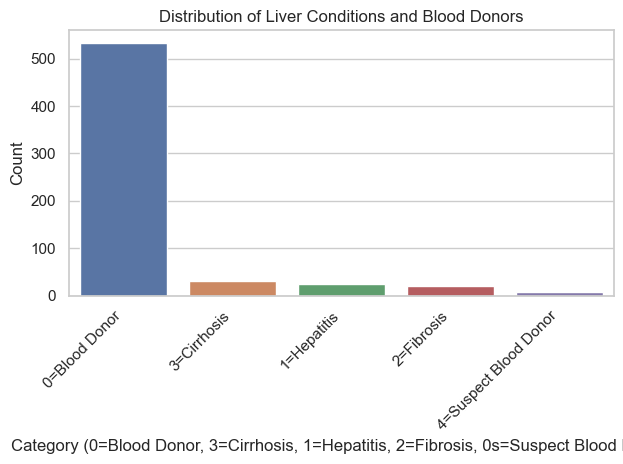

In [29]:
# --- Create the countplot ---

sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Liver Conditions and Blood Donors')
plt.xlabel('Category (0=Blood Donor, 3=Cirrhosis, 1=Hepatitis, 2=Fibrosis, 0s=Suspect Blood Donor)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotates labels by 45 degrees and aligns them to the right

# --- Adjust layout to prevent labels from being cut off ---
plt.tight_layout()
plt.show()

In [9]:
# Option A: Assign a new numerical code
df['Category'] = df['Category'].replace('0s=suspect Blood Donor', '4=Suspect Blood Donor')
# Then, if Category is still 'object', you might need to convert it to a proper categorical dtype
# df['Category'] = df['Category'].astype('category')

In [10]:
df['Category'] = df['Category'].astype('category')

print(df['Category'].value_counts())

Category
0=Blood Donor            533
3=Cirrhosis               30
1=Hepatitis               24
2=Fibrosis                21
4=Suspect Blood Donor      7
Name: count, dtype: int64


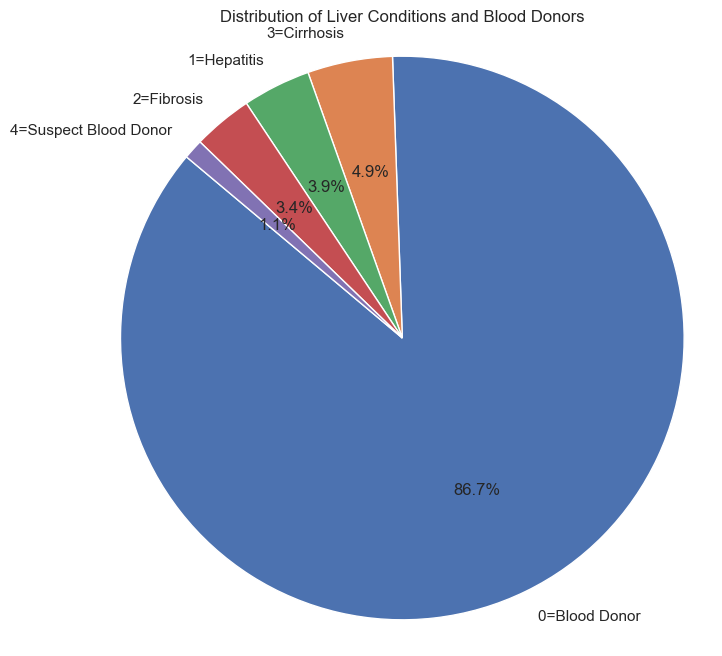

In [30]:

# Get the counts for each category
category_counts = df['Category'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8)) # Adjust figure size for better readability
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%', # Format percentages to one decimal place
        startangle=140) # Start the first slice at an angle for better visualization
plt.title('Distribution of Liver Conditions and Blood Donors')

# Ensure the circle is drawn as a circle (equal aspect ratio)
plt.axis('equal')
plt.show()

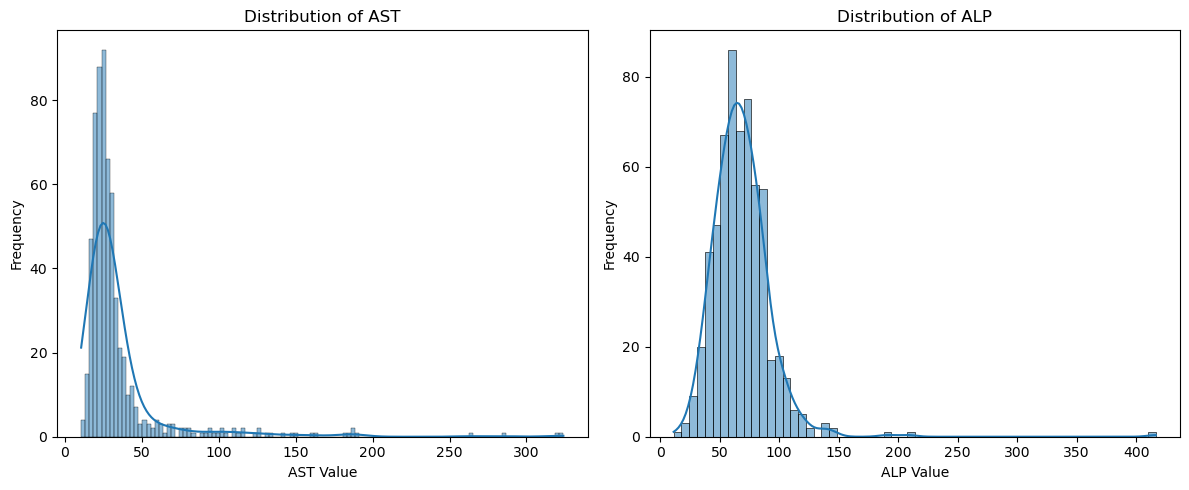

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['AST'], kde=True)
plt.title('Distribution of AST')
plt.xlabel('AST Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['ALP'], kde=True)
plt.title('Distribution of ALP')
plt.xlabel('ALP Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
print(df['Category'].value_counts())

Category
0=Blood Donor            533
3=Cirrhosis               30
1=Hepatitis               24
2=Fibrosis                21
4=Suspect Blood Donor      7
Name: count, dtype: int64


In [14]:
df.shape

(615, 14)

In [15]:
df.describe() #Check for basic statistics(mean, std, min, max, etc)

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


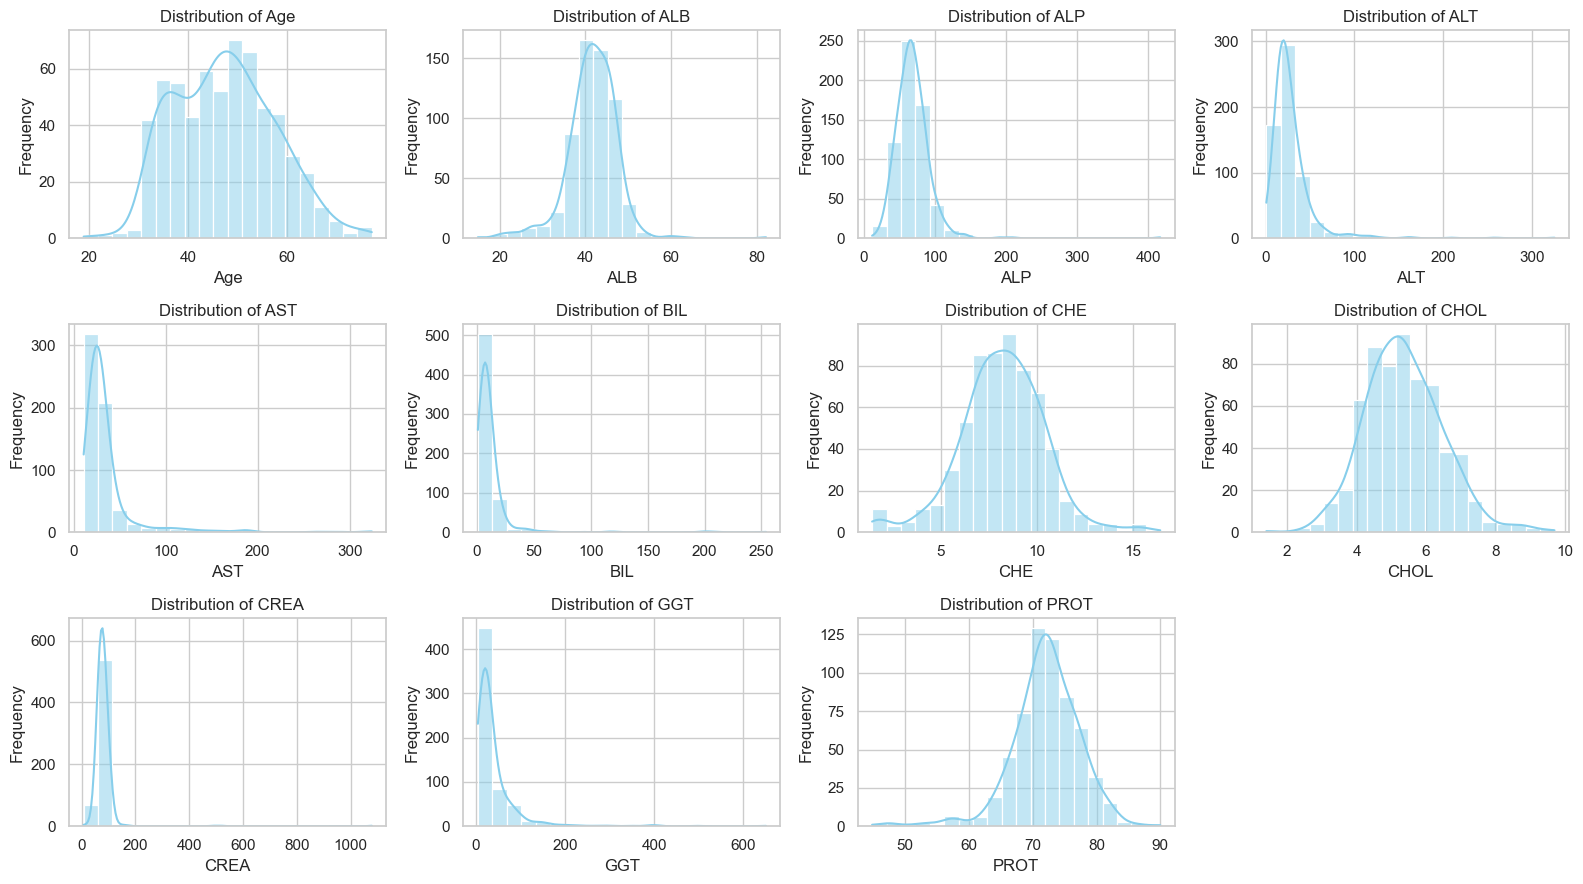

In [31]:
import numpy as np # Import numpy for np.nan if needed for any checks

sns.set(style="whitegrid")

# Define the numerical features from your current dataset
features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Determine the number of rows and columns for subplots
n_features = len(features)
n_cols = 4 # Let's aim for 4 columns
n_rows = (n_features + n_cols - 1) // n_cols # Calculate rows needed (e.g., 11 features -> 3 rows for 4 cols = 3 plots, 4 plots, 4 plots)

plt.figure(figsize=(n_cols * 4, n_rows * 3)) # Adjust figure size dynamically

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1) # (rows, columns, plot_number)

    
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')

    # Corrected title: Use f-string correctly to embed the feature name
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [17]:
import pandas as pd
import numpy as np

# Define all columns that are expected to be numerical in your dataset
# Based on your previous df.columns:
numerical_features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Convert 'Sex' to numerical if it's not already (assuming 'f' and 'm' are the values)
# Adjust mapping if your 'Sex' values are different (e.g., 'Male', 'Female')
if 'Sex' in df.columns and df['Sex'].dtype == 'object':
    print("Converting 'Sex' column to numerical (0 for f, 1 for m). Adjust if values differ.")
    df['Sex'] = df['Sex'].replace({'f': 0, 'm': 1}).astype(float) # Use float to be consistent with other numericals
if 'Sex' in df.columns and 'Sex' not in numerical_features:
    numerical_features.append('Sex')
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, fill any remaining NaNs (from 'm' or other sources) with the median
# Ensure 'Category' is excluded if it's not numerical
df.fillna(df[numerical_features].median(), inplace=True)

print("DataFrame info after robust numerical conversion and imputation:")
df.info()
print("\nNaN counts after cleaning:")
print(df.isnull().sum())

from sklearn.preprocessing import StandardScaler

# Re-define x and y after the cleaning
y = df['Category'] # Your target variable
x = df[numerical_features] # Your numerical features for scaling

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("\nSuccessfully scaled features (x_scaled shape):", x_scaled.shape)

Converting 'Sex' column to numerical (0 for f, 1 for m). Adjust if values differ.
DataFrame info after robust numerical conversion and imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  615 non-null    int64   
 1   Category    615 non-null    category
 2   Age         615 non-null    int64   
 3   Sex         615 non-null    float64 
 4   ALB         615 non-null    float64 
 5   ALP         615 non-null    float64 
 6   ALT         615 non-null    float64 
 7   AST         615 non-null    float64 
 8   BIL         615 non-null    float64 
 9   CHE         615 non-null    float64 
 10  CHOL        615 non-null    float64 
 11  CREA        615 non-null    float64 
 12  GGT         615 non-null    float64 
 13  PROT        615 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 63.4 KB

NaN counts

In [32]:


# --- Step 1: Define your target variable (y) ---
# Your target variable is 'Category'
y = df['Category']
numerical_features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Filter x to include only these numerical features
x = df[numerical_features]

# --- Step 3: Apply StandardScaler ---
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# x_scaled is now a NumPy array. If you want it back as a DataFrame with column names:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# You can print the head of the scaled features to verify
print("Head of scaled features (x_scaled_df):")
print(x_scaled_df.head())

print("\nShape of x_scaled:", x_scaled.shape)
print("Shape of y:", y.shape)

Head of scaled features (x_scaled_df):
        Age       Sex       ALB       ALP       ALT       AST       BIL  \
0 -1.533616  0.794544 -0.540739 -0.613566 -0.815675 -0.383693 -0.198236   
1 -1.533616  0.794544 -0.540739  0.081055 -0.410629 -0.305057 -0.381375   
2 -1.533616  0.794544  0.914755  0.252759  0.305084  0.538767 -0.269457   
3 -1.533616  0.794544  0.273645 -0.633077  0.084865 -0.368571  0.381706   
4 -1.533616  0.794544 -0.419448  0.229345  0.163515 -0.302033 -0.091404   

        CHE      CHOL      CREA       GGT      PROT  
0 -0.574734 -1.928670  0.497070 -0.502286 -0.564419  
1  1.349161 -0.504314 -0.146590 -0.438203  0.826054  
2  0.291926 -0.148226  0.094783 -0.115957  1.345164  
3 -0.393234 -0.593337 -0.025903 -0.104971  0.677737  
4  0.432588 -0.949425 -0.106361 -0.176378 -0.620038  

Shape of x_scaled: (615, 12)
Shape of y: (615,)


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Ensure pandas is imported if not already

# --- Step 1: Define your target variable (y) ---
# Your target variable is 'Category'
y = df['Category']

# --- Step 2: Define your selected features (x) ---
# Use only the columns you specified
selected_features = ['AST', 'ALP', 'ALT', 'Age', 'BIL', 'CHOL', 'CREA']

# Create the features DataFrame 'x' using only these columns
x = df[selected_features]

# --- Step 3: Apply StandardScaler to the selected features ---
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert x_scaled back to a DataFrame for easier inspection/use,
# keeping the column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# --- Verification (Optional but Recommended) ---
print("Head of selected and scaled features (x_scaled_df):")
print(x_scaled_df.head())

print("\nShape of x_scaled:", x_scaled.shape)
print("Shape of y:", y.shape)

# Ensure no NaNs are present in the features after scaling (they shouldn't be if previous steps worked)
print("\nNaNs in x_scaled_df after scaling:")
print(x_scaled_df.isnull().sum())

Head of selected and scaled features (x_scaled_df):
        AST       ALP       ALT       Age       BIL      CHOL      CREA
0 -0.383693 -0.613566 -0.815675 -1.533616 -0.198236 -1.903634  0.497070
1 -0.305057  0.081055 -0.410629 -1.533616 -0.381375 -0.505077 -0.146590
2  0.538767  0.252759  0.305084 -1.533616 -0.269457 -0.148756  0.094783
3 -0.368571 -0.633077  0.084865 -1.533616  0.381706 -0.558525 -0.025903
4 -0.302033  0.229345  0.163515 -1.533616 -0.091404 -0.932661 -0.106361

Shape of x_scaled: (615, 7)
Shape of y: (615,)

NaNs in x_scaled_df after scaling:
AST     0
ALP     0
ALT     0
Age     0
BIL     0
CHOL    0
CREA    0
dtype: int64


In [33]:

if df['Age'].isnull().any():
    print("Warning: 'Age' column still contains NaNs. Converting to integer will fill them or raise error.")

# Convert 'Age' to integer. Use .astype(int)
# If there were floats like 34.9, this will truncate to 34.
df['Age'] = df['Age'].astype(int)
features_to_round = ['AST', 'ALP', 'ALT', 'BIL', 'CHOL', 'CREA', 'Age']

for feature in features_to_round:
    if pd.api.types.is_numeric_dtype(df[feature]):
        df[feature] = df[feature].round(1)
    else:
        print(f"Warning: '{feature}' is not numeric and will not be rounded.")

# --- Verification ---
print("DataFrame info after converting 'Age' and rounding other features:")
df.info()
print("\nHead of DataFrame to check formatting:")
print(df.head())

DataFrame info after converting 'Age' and rounding other features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  615 non-null    int64   
 1   Category    615 non-null    category
 2   Age         615 non-null    int32   
 3   Sex         615 non-null    float64 
 4   ALB         615 non-null    float64 
 5   ALP         615 non-null    float64 
 6   ALT         615 non-null    float64 
 7   AST         615 non-null    float64 
 8   BIL         615 non-null    float64 
 9   CHE         615 non-null    float64 
 10  CHOL        615 non-null    float64 
 11  CREA        615 non-null    float64 
 12  GGT         615 non-null    float64 
 13  PROT        615 non-null    float64 
dtypes: category(1), float64(11), int32(1), int64(1)
memory usage: 61.0 KB

Head of DataFrame to check formatting:
   Unnamed: 0       Category  Age  Sex   

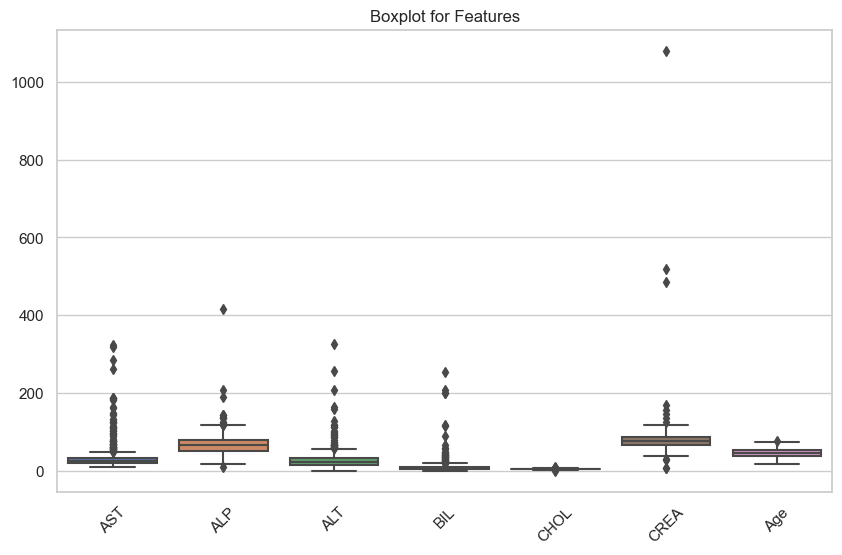

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['AST', 'ALP', 'ALT', 'BIL', 'CHOL', 'CREA', 'Age']
#Boxplot for detecting outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplot for Features')            
plt.xticks(rotation=45)
plt.show()            

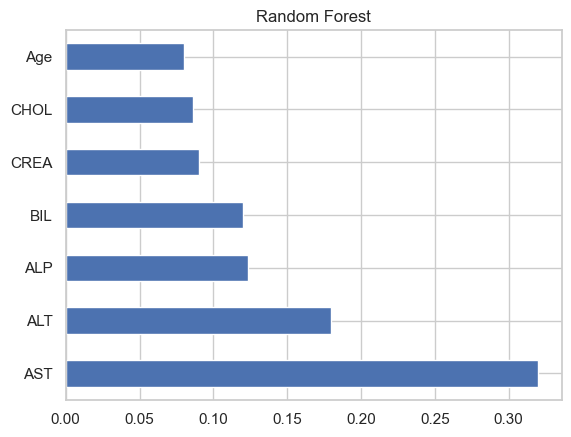

Top Features by Random Forest:
AST     0.319894
ALT     0.179747
ALP     0.123632
BIL     0.120016
CREA    0.090478
CHOL    0.086111
Age     0.080121
dtype: float64


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_scaled, y)
importances = rf.feature_importances_
features = pd.Series(importances, index=x.columns)
features.sort_values(ascending=False).plot(kind='barh', title="Random Forest")
plt.show()

print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Make sure LabelEncoder is imported if not already
import pandas as pd # Make sure pandas is imported

# --- Re-confirming X_scaled_df and y_encoded are ready ---
# (These steps should have been run from previous successful code blocks)

# 1. Define y (target) and X (features)
y_categorical = df['Category']
selected_features_for_model = ['AST', 'ALP', 'ALT', 'Age', 'BIL', 'CHOL', 'CREA'] # Your chosen features
X = df[selected_features_for_model]

# 2. Encode y to numerical labels if it's not already
le = LabelEncoder()
y_encoded = le.fit_transform(y_categorical)
print("Category to Numerical Encoding:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# 3. Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nShape of X_scaled_df:", X_scaled_df.shape)
print("Shape of y_encoded:", y_encoded.shape)

# --- CORRECTED RFE Code ---

# Define your estimator (the 'model' that was missing)
# Using LogisticRegression, and including class_weight='balanced' due to class imbalance
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Initialize RFE with your chosen model and the number of features to select
# Let's say you want to select the top 6 features as in your commented code
n_features_to_select = 4
selector = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1) # step=1 removes one feature at a time

# Fit RFE to your scaled features and encoded target
selector.fit(X_scaled_df, y_encoded)

# Get the selected features
selected_rfe_features = X_scaled_df.columns[selector.support_]

print(f"\nSelected Features using RFE (top {n_features_to_select}):")
print(list(selected_rfe_features))

print("\nFeature Ranking (1 = selected):")
# You can also see the ranking of all features
feature_ranking = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Rank': selector.ranking_,
    'Selected': selector.support_
})
feature_ranking.sort_values(by='Rank', inplace=True)
print(feature_ranking)

Category to Numerical Encoding:
0=Blood Donor -> 0
1=Hepatitis -> 1
2=Fibrosis -> 2
3=Cirrhosis -> 3
4=Suspect Blood Donor -> 4

Shape of X_scaled_df: (615, 7)
Shape of y_encoded: (615,)

Selected Features using RFE (top 4):
['AST', 'ALP', 'BIL', 'CREA']

Feature Ranking (1 = selected):
  Feature  Rank  Selected
0     AST     1      True
1     ALP     1      True
4     BIL     1      True
6    CREA     1      True
5    CHOL     2     False
3     Age     3     False
2     ALT     4     False


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#Split the scaled data into 80% training and 20% testing
x_train, x_test,y_train, y_test = train_test_split(
x_scaled, y, test_size=0.4, random_state=42, stratify=y)


In [25]:
from sklearn.model_selection import train_test_split
# Ensure X_scaled_df and y_encoded are available from previous steps.
# You already have X_scaled_df from the feature selection RFE, which has 7 columns.
# And y_encoded from the LabelEncoder.

# Re-assign X_scaled and y to ensure they're the correct variables from your RFE selection
# If you want to use the features selected by RFE:
# You need to use the 'selected_rfe_features' from your previous RFE output.
# From the image, your selected RFE features are ['AST', 'ALP', 'BIL', 'CREA'].
X_for_split = X_scaled_df[selected_rfe_features] # Use the DataFrame with only selected features
y_for_split = y_encoded # Use the numerically encoded target

# Split the data into training and testing sets
# Using test_size=0.4 (40% for testing) as in your code.
# stratify=y is crucial for imbalanced datasets like yours, ensuring
# the proportion of classes is roughly the same in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_for_split, y_for_split, test_size=0.4, random_state=42, stratify=y_for_split
)

# --- Add print statements to see the output ---
print("--- Data Split Information ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Optional: Check the distribution of classes in train and test sets to confirm stratification
from collections import Counter
print("\nClass distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))

--- Data Split Information ---
Shape of X_train: (369, 4)
Shape of X_test: (246, 4)
Shape of y_train: (369,)
Shape of y_test: (246,)

Class distribution in y_train: Counter({0: 320, 3: 18, 1: 14, 2: 13, 4: 4})
Class distribution in y_test: Counter({0: 213, 3: 12, 1: 10, 2: 8, 4: 3})


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported


model = LogisticRegression(random_state=42, solver='liblinear', max_iter=2000, class_weight='balanced')

# Train the model using the training data
print("Training Logistic Regression Model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- Model Prediction ---
# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Model Evaluation ---
print("\n--- Model Evaluation ---")

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# 2. Confusion Matrix
# This shows correct vs. incorrect predictions for each class
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


print("\nClassification Report:")

class_names_original = le.classes_
print(classification_report(y_test, y_pred, target_names=class_names_original))

# --- Interpretation Guidance ---
print("\n--- Interpretation Guidance ---")
print("Accuracy alone can be misleading due to class imbalance.")
print("Focus on 'Precision', 'Recall', and 'F1-score' in the Classification Report:")
print(" - Precision: Proportion of positive identifications that were actually correct.")
print(" - Recall: Proportion of actual positives that were identified correctly (Sensitivity).")
print(" - F1-score: Harmonic mean of Precision and Recall. A good balance between them.")
print("Pay particular attention to the scores for the minority classes (Cirrhosis, Hepatitis, Fibrosis, Suspect Blood Donor).")

Training Logistic Regression Model...
Model training complete.

--- Model Evaluation ---
Accuracy Score: 0.9106

Confusion Matrix:
[[211   0   0   1   1]
 [  4   2   3   1   0]
 [  4   1   2   1   0]
 [  2   0   2   8   0]
 [  2   0   0   0   1]]

Classification Report:
                       precision    recall  f1-score   support

        0=Blood Donor       0.95      0.99      0.97       213
          1=Hepatitis       0.67      0.20      0.31        10
           2=Fibrosis       0.29      0.25      0.27         8
          3=Cirrhosis       0.73      0.67      0.70        12
4=Suspect Blood Donor       0.50      0.33      0.40         3

             accuracy                           0.91       246
            macro avg       0.63      0.49      0.53       246
         weighted avg       0.90      0.91      0.90       246


--- Interpretation Guidance ---
Accuracy alone can be misleading due to class imbalance.
Focus on 'Precision', 'Recall', and 'F1-score' in the Classification 

In [28]:
import joblib

# Define a descriptive filename for your saved model
filename = 'logistic_regression_HepatitisC_model.pkl'

# Save the trained model to a file
joblib.dump(model, filename)

# Corrected print statement: use the 'filename' variable
print(f"Model successfully saved as '{filename}'")

Model successfully saved as 'logistic_regression_HepatitisC_model.pkl'
